## Data Preprocessing

In [111]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import tree

In [26]:
telco_raw_df = pd.read_csv("telco_customer_churn.csv")
telco_raw_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [27]:
telco_cleanup = {
    "gender": {"Male": 0, "Female": 1},
    "Partner": {"No": 0, "Yes": 1},
    "Dependents": {"No": 0, "Yes": 1},
    "PhoneService": {"No": 0, "Yes": 1},
    "MultipleLines": {"No phone service": 0, "No": 0, "Yes": 1},
    "InternetService": {"No": 0, "Fiber optic": 1, "DSL": 2},
    "OnlineSecurity": {"No internet service": 0, "No": 0, "Yes": 1},
    "OnlineBackup": {"No internet service": 0, "No": 0, "Yes": 1},
    "DeviceProtection": {"No internet service": 0, "No": 0, "Yes": 1},
    "TechSupport": {"No internet service": 0, "No": 0, "Yes": 1},
    "StreamingTV": {"No internet service": 0, "No": 0, "Yes": 1},
    "StreamingMovies": {"No internet service": 0, "No": 0, "Yes": 1},
    "Contract": {"Month-to-month": 0, "One year": 1, "Two year": 2},
    "PaperlessBilling": {"No": 0, "Yes": 1},
    "PaymentMethod": {"Electronic check": 0, "Mailed check": 1, "Bank transfer (automatic)": 2, "Credit card (automatic)": 3},
    "Churn": {"No": 0, "Yes": 1}
}
telco_encoded_df = telco_raw_df.replace(telco_cleanup)
telco_encoded_df = telco_encoded_df.drop(["customerID"], axis=1)
telco_encoded_df

/var/folders/2_/0_v1ljtj3yj__b10w7ddxl280000gn/T/ipykernel_82675/53765672.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_encoded_df = telco_raw_df.replace(telco_cleanup)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,0,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,2,1,0,1,1,1,1,1,1,1,84.80,1990.5,0
7039,1,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.9,0
7040,1,0,1,1,11,0,0,2,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,0,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.6,1


In [28]:
telco_encoded_df['TotalCharges'] = telco_encoded_df['TotalCharges'].replace(' ', 0)
telco_encoded_df["TotalCharges"] = pd.to_numeric(telco_encoded_df["TotalCharges"])

<Axes: >

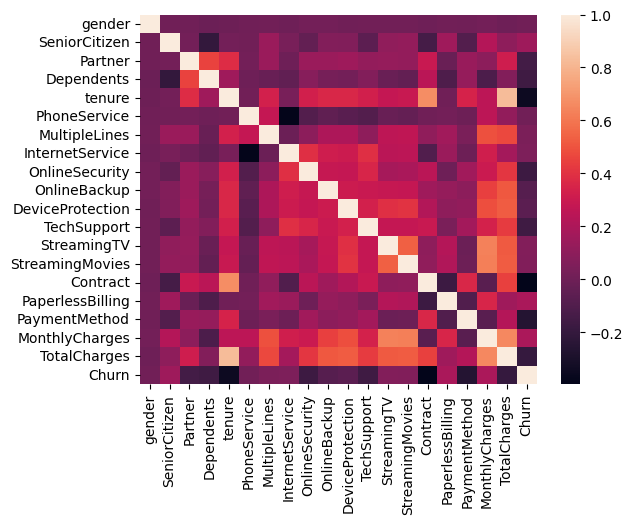

In [31]:
correlation_matrix = telco_encoded_df.corr()
sns.heatmap(correlation_matrix)

#### Our numerical features are tenure, MonthlyCharges, and TotalCharges. We see that of these, MonthlyCharges has the highest correlation with the churn target. 

In [32]:
telco_encoded_df.shape

(7043, 20)

#### Seeing that we have 7000 samples, I will use the last 543 for final evaluation of Log Reg and the rest partition using K-Fold for training and testing

In [112]:
X = telco_encoded_df.iloc[:, :19]
Y = telco_encoded_df.iloc[:, 19:]
telco_encoded_df_data = telco_encoded_df.iloc[:6500, :]
telco_encoded_df_eval = telco_encoded_df.iloc[6500:, :]

In [35]:
print(telco_encoded_df_data.shape)
print(telco_encoded_df_eval.shape)

(6500, 20)
(543, 20)


In [79]:
X_train = telco_encoded_df_data.iloc[:, :19]
y_train = telco_encoded_df_data.iloc[:, 19:]
X_eval = telco_encoded_df_eval.iloc[:, :19]
y_eval = telco_encoded_df_eval.iloc[:, 19:]

In [80]:
kf = StratifiedKFold(n_splits=10)
splits = []
for split in kf.split(X_train, y_train):
    splits.append(split)

In [67]:
log_cv_clf = LogisticRegressionCV(cv=10, n_jobs=-2, max_iter=1000).fit(X_train, y_train.values.ravel())

In [72]:
y_pred_log = log_cv_clf.predict(X_eval)
print("Confusion Matrix: " + str(confusion_matrix(y_pred_log, y_eval)))
print("Accuracy Score: " + str(accuracy_score(y_pred_log, y_eval)))
print("Precision Score: " + str(precision_score(y_pred_log, y_eval)))
print("Recall Score: " + str(recall_score(y_pred_log, y_eval)))
print("F1 Score: " + str(f1_score(y_pred_log, y_eval)))

Confusion Matrix: [[353  71]
 [ 36  83]]
Accuracy Score: 0.8029465930018416
Precision Score: 0.538961038961039
Recall Score: 0.6974789915966386
F1 Score: 0.608058608058608


In [141]:
X_2_train = X_train[["tenure","MonthlyCharges", "TotalCharges"]]
X_2_eval = X_eval[["tenure","MonthlyCharges", "TotalCharges"]]

In [142]:
log_cv_clf = LogisticRegressionCV(cv=10, n_jobs=-2, max_iter=1000).fit(X_2_train, y_train.values.ravel())

In [143]:
y_pred_log = log_cv_clf.predict(X_2_eval)
print("Confusion Matrix: " + str(confusion_matrix(y_pred_log, y_eval)))
print("Accuracy Score: " + str(accuracy_score(y_pred_log, y_eval)))
print("Precision Score: " + str(precision_score(y_pred_log, y_eval)))
print("Recall Score: " + str(recall_score(y_pred_log, y_eval)))
print("F1 Score: " + str(f1_score(y_pred_log, y_eval)))

Confusion Matrix: [[356  87]
 [ 33  67]]
Accuracy Score: 0.7790055248618785
Precision Score: 0.43506493506493504
Recall Score: 0.67
F1 Score: 0.5275590551181102


In [82]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train.values.ravel()).predict(X_eval)

In [84]:
print("Confusion Matrix: " + str(confusion_matrix(y_pred_gnb, y_eval)))
print("Accuracy Score: " + str(accuracy_score(y_pred_gnb, y_eval)))
print("Precision Score: " + str(precision_score(y_pred_gnb, y_eval)))
print("Recall Score: " + str(recall_score(y_pred_gnb, y_eval)))
print("F1 Score: " + str(f1_score(y_pred_gnb, y_eval)))

Confusion Matrix: [[305  41]
 [ 84 113]]
Accuracy Score: 0.7697974217311234
Precision Score: 0.7337662337662337
Recall Score: 0.5736040609137056
F1 Score: 0.6438746438746439


Average Accuracy: 0.7575384615384616


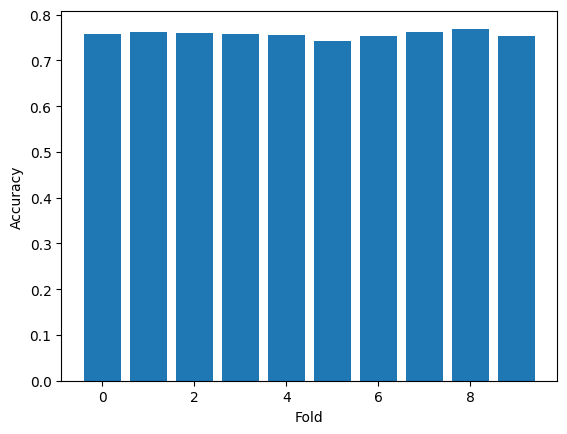

In [106]:
gnb_accuracies = []
gnb_precisions = []
gnb_recalls = []
gnb_f1s = []

for split in splits:
    x_trn = X_train.iloc[split[0]]
    y_trn = y_train.iloc[split[0]]
    x_tst = X_train.iloc[split[1]]
    y_tst = y_train.iloc[split[1]]
    y_pred = gnb.fit(x_trn, y_trn.values.ravel()).predict(x_tst)
    gnb_accuracies.append(accuracy_score(y_pred, y_tst))
    gnb_precisions.append(precision_score(y_pred, y_tst))
    gnb_recalls.append(recall_score(y_pred, y_tst))
    gnb_f1s.append(f1_score(y_pred, y_tst))

plt.bar([i for i in range(len(splits))], gnb_accuracies)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show
print("Average Accuracy: " + str(sum(gnb_accuracies)/len(gnb_accuracies)))

Average Precision: 0.7347069223446213


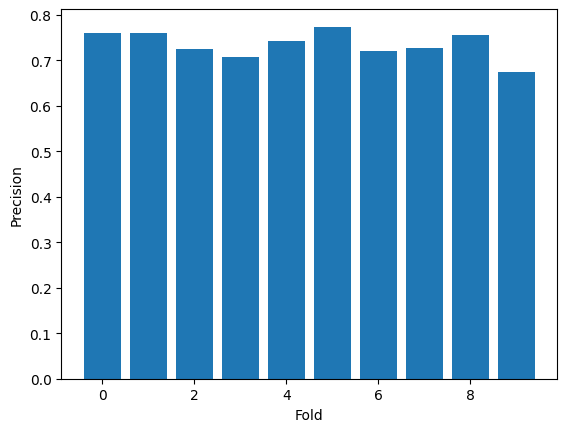

In [108]:
plt.bar([i for i in range(len(splits))], gnb_precisions)
plt.xlabel("Fold")
plt.ylabel("Precision")
plt.show
print("Average Precision: " + str(sum(gnb_precisions)/len(gnb_precisions)))

Average Recall: 0.5294147910401374


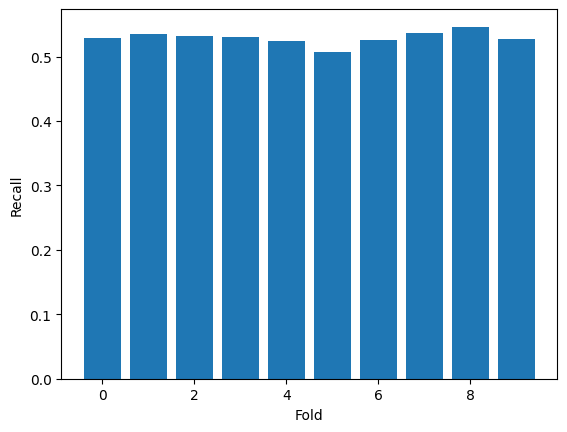

In [109]:
plt.bar([i for i in range(len(splits))], gnb_recalls)
plt.xlabel("Fold")
plt.ylabel("Recall")
plt.show
print("Average Recall: " + str(sum(gnb_recalls)/len(gnb_recalls)))

Average F1: 0.6150923695951155


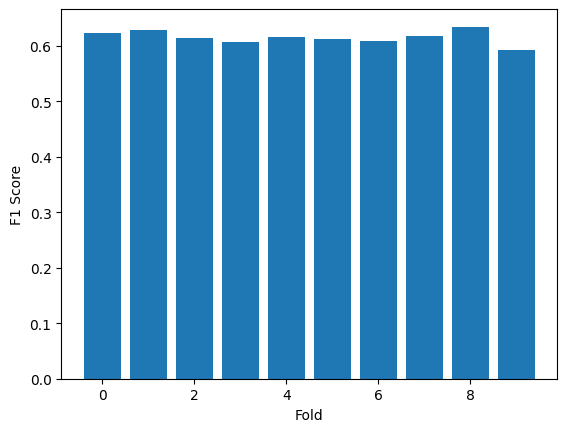

In [110]:
plt.bar([i for i in range(len(splits))], gnb_f1s)
plt.xlabel("Fold")
plt.ylabel("F1 Score")
plt.show
print("Average F1: " + str(sum(gnb_f1s)/len(gnb_f1s)))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


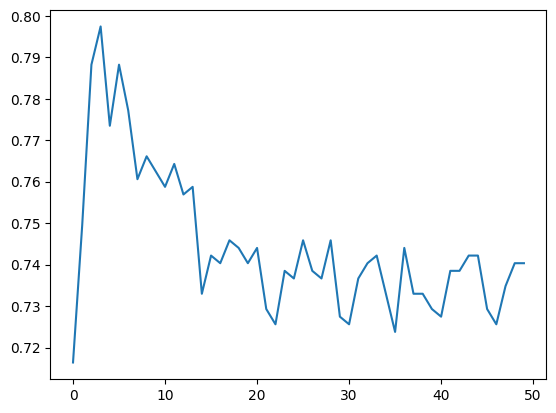

In [129]:
dtc_accuracies = []
dtc_precisions = []
dtc_recalls = []
dtc_f1s = []

for i in range(1, 51):
    dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_eval)
    dtc_accuracies.append(accuracy_score(y_pred, y_eval))
    dtc_precisions.append(precision_score(y_pred, y_eval))
    dtc_recalls.append(recall_score(y_pred, y_eval))
    dtc_f1s.append(f1_score(y_pred, y_eval))

plt.plot([i for i in range(len(dtc_accuracies))], dtc_accuracies)

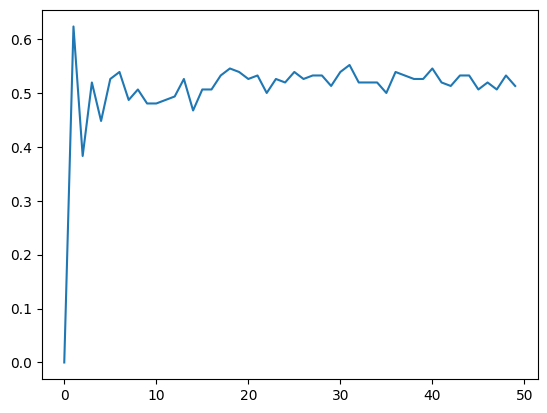

In [130]:
plt.plot([i for i in range(len(dtc_accuracies))], dtc_precisions)

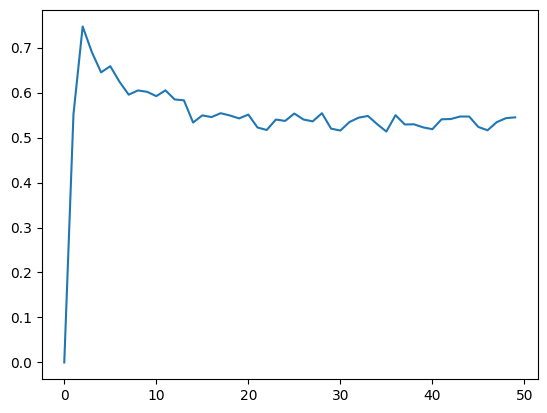

In [132]:
plt.plot([i for i in range(len(dtc_accuracies))], dtc_recalls)

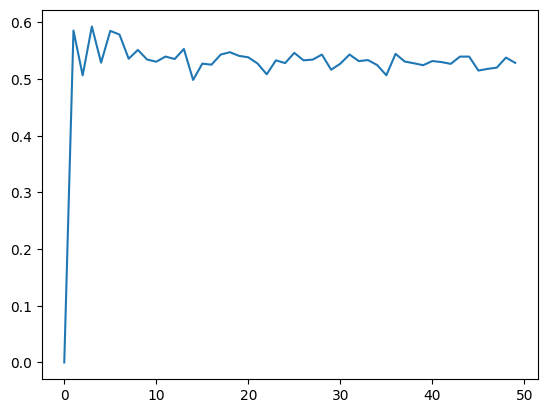

In [133]:
plt.plot([i for i in range(len(dtc_accuracies))], dtc_f1s)

In [144]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_eval)
print("Confusion Matrix: " + str(confusion_matrix(y_pred, y_eval)))
print("Accuracy: " + str(accuracy_score(y_pred, y_eval)))
print("Precision: " + str(precision_score(y_pred, y_eval)))
print("Recall: " + str(recall_score(y_pred, y_eval)))
print("F1 Score: " + str(f1_score(y_pred, y_eval)))

Confusion Matrix: [[351  85]
 [ 38  69]]
Accuracy: 0.7734806629834254
Precision: 0.44805194805194803
Recall: 0.6448598130841121
F1 Score: 0.5287356321839081


[Text(0.5225409836065574, 0.9166666666666666, 'x[14] <= 0.5\nentropy = 0.832\nsamples = 6500\nvalue = [4785, 1715]'),
 Text(0.26229508196721313, 0.75, 'x[17] <= 68.925\nentropy = 0.984\nsamples = 3577\nvalue = [2057, 1520]'),
 Text(0.13114754098360656, 0.5833333333333334, 'x[4] <= 5.5\nentropy = 0.87\nsamples = 1524\nvalue = [1080, 444]'),
 Text(0.06557377049180328, 0.4166666666666667, 'x[7] <= 0.5\nentropy = 0.981\nsamples = 679\nvalue = [395, 284]'),
 Text(0.03278688524590164, 0.25, 'x[18] <= 33.4\nentropy = 0.845\nsamples = 264\nvalue = [192, 72]'),
 Text(0.01639344262295082, 0.08333333333333333, 'entropy = 0.949\nsamples = 155\nvalue = [98, 57]'),
 Text(0.04918032786885246, 0.08333333333333333, 'entropy = 0.578\nsamples = 109\nvalue = [94, 15]'),
 Text(0.09836065573770492, 0.25, 'x[17] <= 55.425\nentropy = 1.0\nsamples = 415\nvalue = [203, 212]'),
 Text(0.08196721311475409, 0.08333333333333333, 'entropy = 0.993\nsamples = 356\nvalue = [161, 195]'),
 Text(0.11475409836065574, 0.0833

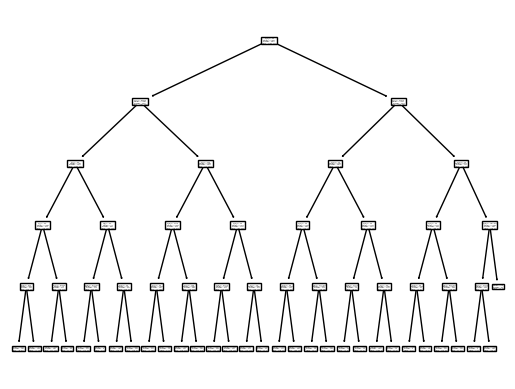

In [140]:
tree.plot_tree(dtc)